# Random Forest - Msc Data Science ISA IQBAL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data = pd.read_csv('city_temperature.csv')

data.head()

/var/folders/th/_1_xv48d6czgtmqkf45wrjq40000gp/T/ipykernel_84524/3058777159.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('city_temperature.csv')


,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [3]:
data.dropna(inplace=True)
data['Year'] = data['Year'].astype(int)
data['Month'] = data['Month'].astype(int)
data['Day'] = data['Day'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1455337 entries, 1450990 to 2906326
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Region          1455337 non-null  object 
 1   Country         1455337 non-null  object 
 2   State           1455337 non-null  object 
 3   City            1455337 non-null  object 
 4   Month           1455337 non-null  int64  
 5   Day             1455337 non-null  int64  
 6   Year            1455337 non-null  int64  
 7   AvgTemperature  1455337 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 99.9+ MB


In [5]:
X = data[['Year', 'Month', 'Day']]  
y = data['AvgTemperature'] 

In [6]:
data_sampled = data.sample(frac=0.01, random_state=42)


In [7]:
X_sampled = data_sampled[['Year', 'Month', 'Day']]
y_sampled = data_sampled['AvgTemperature']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)


In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1) 
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [19]:
y_pred = rf_model.predict(X_test_scaled)


In [21]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Random Forest Regression - Mean Absolute Error: {mae}')
print(f'Random Forest Regression - Mean Squared Error: {mse}')
print(f'Random Forest Regression - R-squared: {r2}')

Random Forest Regression - Mean Absolute Error: 10.83178185245591
Random Forest Regression - Mean Squared Error: 246.4840274482108
Random Forest Regression - R-squared: 0.4390585452220287


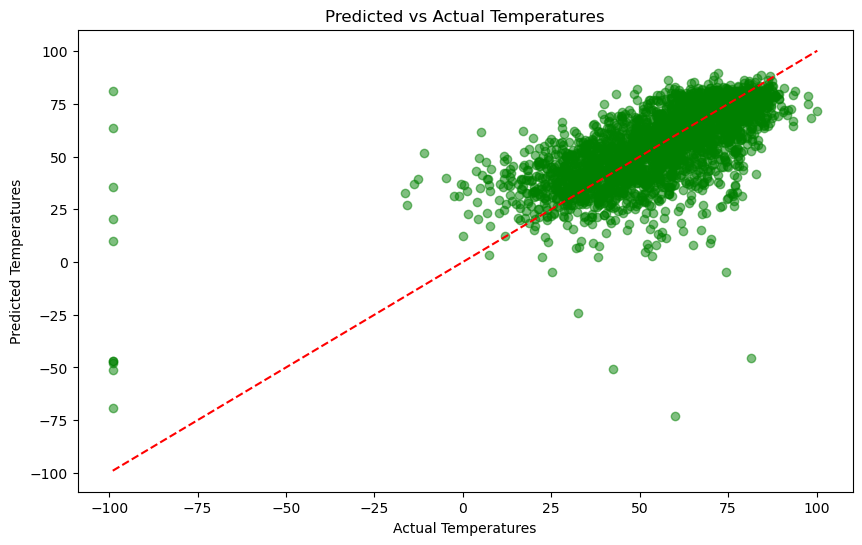

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Predicted vs Actual Temperatures')
plt.xlabel('Actual Temperatures')
plt.ylabel('Predicted Temperatures')
plt.show()

# Linear Regression baseline model

In [26]:
from sklearn.linear_model import LinearRegression

In [28]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [30]:
y_lr_pred = lr_model.predict(X_test_scaled)

In [32]:
lr_mae = mean_absolute_error(y_test, y_lr_pred)
lr_mse = mean_squared_error(y_test, y_lr_pred)
lr_r2 = r2_score(y_test, y_lr_pred)

print(f'Linear Regression - Mean Absolute Error: {lr_mae}')
print(f'Linear Regression - Mean Squared Error: {lr_mse}')
print(f'Linear Regression - R-squared: {lr_r2}')

Linear Regression - Mean Absolute Error: 15.913008139063875
Linear Regression - Mean Squared Error: 426.2085585246849
Linear Regression - R-squared: 0.030046484825910436


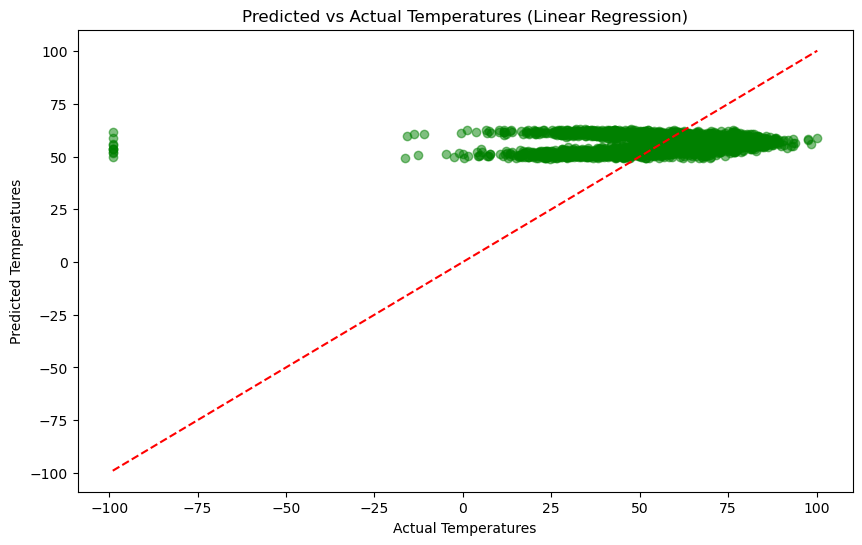

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_lr_pred, alpha=0.5, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Predicted vs Actual Temperatures (Linear Regression)')
plt.xlabel('Actual Temperatures')
plt.ylabel('Predicted Temperatures')
plt.show()

# Comparison of R-Squared for Linear Regression Vs RandForest

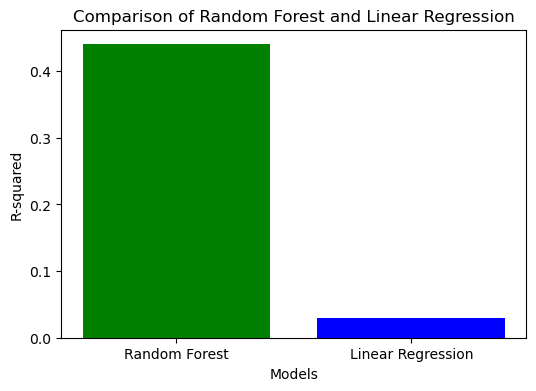

In [37]:
rf_r2 = 0.44 
lr_r2 = 0.03  

models = ['Random Forest', 'Linear Regression']
r2_scores = [rf_r2, lr_r2]

plt.figure(figsize=(6, 4))
plt.bar(models, r2_scores, color=['green', 'blue'])

plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('Comparison of Random Forest and Linear Regression')

plt.show()
